# Ervaring

Het _leren_ bij machine learning gebeurt aan de hand van een bepaald leeralgoritme mits blootstelling aan voldoende data. Er zijn drie grote families leeralgoritmes afhankelijk van de soort blootstelling of manier waarop er ervaring kan opgedaan worden: **_supervised_**, **_unsupervised_** en **_reinforcement learning_**. **Ze verschillen specifiek van elkaar naargelang de manier waarop de zoektocht naar optimale parameterwaarden _gestuurd_ wordt**. 

(target-supervised-learning)=
## _Supervised learning_

**Bij _supervised learning_ is het de bedoeling dat het model leert om, bij een gegeven input, een specifieke output te geven die _vooraf vastligt_**. In de training data zijn zogenaamde **_ground truth_** waarden of **targetwaarden** aanwezig. Die geven voor iedere input aan wat de gewenste (_target_) output is. _Supervised learning_ is veruit het meest gebruikte type leeralgoritme. Het is vaak heel efficiënt omdat, tijdens het trainen, aan iedere individuele output een score toegekend kan worden van waaruit een "richting" kan worden afgeleid in de zoektocht naar optimale parameterwaarden. Meer algemeen gesteld, kan er dus rechtstreeks geleerd (of ervaring opgedaan) worden over wat de gewenste model output moet zijn bij een bepaalde input.   
  
:::{note} 🌍 _Airco_
:icon: false
:class: simple
In ons simpel airco voorbeeld, zou ons ideale _getraind_ model, iedere geobserveerde waarde in de training data _en_ alle toekomstige observaties 
perfect moeten kunnen voorspellen. De eigenlijke observaties vormen dus de gewenste (_target_) waarden voor de model output. Het gaat hier dus over _supervised_ training.
:::
  
(target-annotation)=
In de context van beeldherkenning, is _supervised_ learning lange tijd de gouden standaard geweest. Het bekomen van _ground truth_ waarden is hier ook lange tijd een kwestie geweest van 100% manuele inspanningen. **Het proces om _ground truth_ of targetwaarden te voorzien voor supervised learning heet algemeen: data-annotatie**.
  
:::{note} 🌍 _CIFAR-10_
:icon: false
:class: simple
(target-cifar)=
Een populaire _geannoteerde_ publieke dataset voor beeldherkenning is de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.
De dataset bestaat uit RGB foto's met een resolutie van 32x32 pixels voor 10 categorieën: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.  
De bedoeling is om een ML model te ontwikkelen dat toelaat om, bij een willekeurige nieuwe foto (met resolutie 32x32), te beslissen of het om één van de gegeven _classes_ gaat. Wanneer we hier op zoek gaan naar de ideale parameter waarden van een model, hebben we in de training data voor iedere observatie van 3x32x32 waarden ook de _gewenste_ model output $y_i$ ter beschikking.
:::

(target-self-supervised-learning)=
### _Self-supervised learning_
Dit is een variant van _supervised learning_ waarbij de targetwaarde of _ground truth_ in de data zelf vervat zit. Dit is een standaard bij taalmodellen die _next word prediction_ doen. Het model doet een voorspelling voor het volgende woord en die voorspelling kan dan direct vergeleken worden met het effectieve volgende woord in de trainingsdata.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms

100%|██████████| 170M/170M [00:45<00:00, 3.77MB/s] 



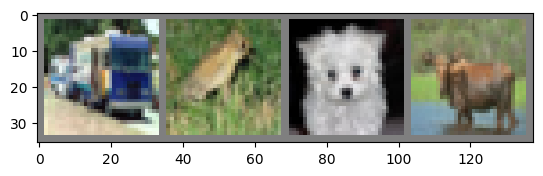

truck frog  dog   deer 


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")


def imshow(img):
    """
    Display an image tensor after unnormalizing it.

    Args:
        img (torch.Tensor): Image tensor to display.
    """
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

(target-unsupervised-learning)=
## _Unsupervised learning_

**Bij _unsupervised learning_ is ervaring gebaseerd op pure blootstelling aan data**. In tegenstelling tot _supervised learning_, is er op voorhand **géén informatie beschikbaar over de gewenste output bij een gegeven input. Het leerobjectief bestaat eruit om data volgens bepaalde principes te structureren**.    
  
Een populair voorbeeld is _K-means clustering_ waarbij parameters worden gezocht om data volgens bepaalde principes van gelijkenis in een vooraf bepaald aantal clusters in te delen.

:::{note} 🌍 K-Means
:icon: false
:class: simple

Hier demonstreren we K-means clustering met de bekende [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).
De data is afkomstig van drie varianten van Irisbloemen:
1. Iris setosa 
2. Iris versicolor
3. Iris virginica  

Voor elke soort werden 50 observaties gemaakt van vier continue features: 
1. Sepal length (cm)
2. Sepal width (cm)
3. Petal length (cm)
4. Petal width (cm)  

We gebruiken alleen Petal length en Petal width (zonder de labels) en de instructie om drie clusters te vinden.
:::

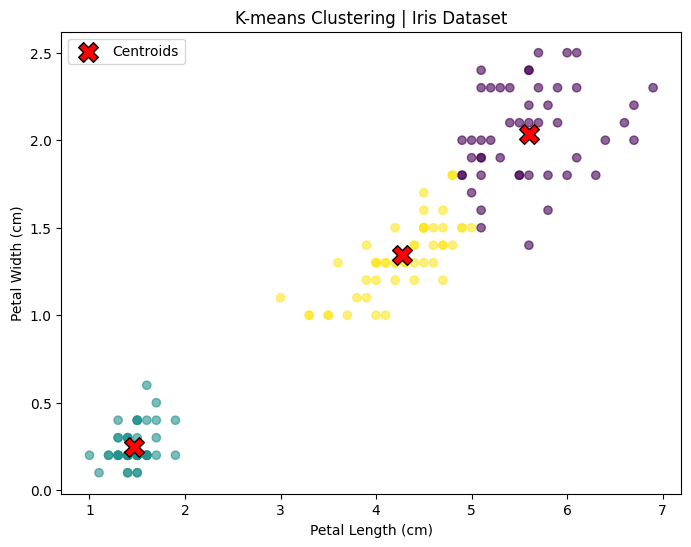

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Laad de iris dataset (zonder labels te gebruiken)
iris = load_iris()
X = iris.data[:, 2:]  # gebruik alleen petal length en petal width

# K-means met 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Visualiseer de clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", alpha=0.6)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    marker="X",
    s=200,
    edgecolors="black",
    label="Centroids",
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-means Clustering | Iris Dataset")
plt.legend()
plt.show()

(target-reinforcement-learning)=
## _Reinforcement learning_
Bij _reinforcement learning_ is er tijdens het leren een interactie met een omgeving. Er is een _feedback loop_ tussen het model en de ervaring die het kan opdoen. Zoals bij _unsupervised learning_ is er **geen rechtstreekse informatie** over iedere model output. Er is echter wel een **onrechtstreekse inschatting van de wenselijkheid van een individuele output onder de vorm van een zgn. _reward_ functie**. Deze familie van leeralgoritmes wordt gebruikt in de context van **actie-planning** taken toepassingen waarbij model outputs de vorm hebben van **sequentiële acties** binnen een al dan niet gesimuleerde **omgeving**. Er wordt _geen_ rechtstreekse evaluatie gedaan van actie-sequenties ten op zichtte van overeenkomstige targets, maar de uitkomst van actie-sequenties wordt wel gescoord ten op zichtte van vooraf gedefinieerde doelstellingen binnen de omgeving.
  
[![](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg)](https://huggingface.co/learn/deep-rl-course/en/unit1/rl-framework)